## Sentiment Analysis

## Basic Libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('/content/centimate analysis.csv')

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df.shape

(1004, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      1004 non-null   int64 
 1   ProductId               1003 non-null   object
 2   UserId                  1004 non-null   object
 3   ProfileName             1004 non-null   object
 4   HelpfulnessNumerator    1004 non-null   int64 
 5   HelpfulnessDenominator  1004 non-null   int64 
 6   Score                   1004 non-null   int64 
 7   Time                    1004 non-null   int64 
 8   Summary                 1004 non-null   object
 9   Text                    1004 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.6+ KB


In [6]:
df.Summary.head()

,Summary
0,Good Quality Dog Food
1,Not as Advertised
2,"""Delight"" says it all"
3,Cough Medicine
4,Great taffy


In [7]:
df.Text.head()

,Text
0,I have bought several of the Vitality canned d...
1,Product arrived labeled as Jumbo Salted Peanut...
2,This is a confection that has been around a fe...
3,If you are looking for the secret ingredient i...
4,Great taffy at a great price. There was a wid...


### Text Preprocessing

In [8]:
! pip install textblob

In [9]:
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
# Lower casing and removing punctuations

df['Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for
x in x.split()))


In [10]:
df['Text'] = df['Text'].str.replace('[^\w\s]', "")
df.Text.head(5)

,Text
0,i have bought several of the vitality canned d...
1,product arrived labeled as jumbo salted peanut...
2,this is a confection that has been around a fe...
3,if you are looking for the secret ingredient i...
4,great taffy at a great price. there was a wide...


Example how a string.replace function works.

In [12]:
string = "yoo the food was delicious "

In [13]:
print(string.replace("delicious", "Yummy"))

yoo the food was Yummy 


### Removal of Stop Words

In [14]:

import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')

stop = stopwords.words('english')

# Example DataFrame
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
print(df.Text.head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0    bought several vitality canned dog food produc...
1    product arrived labeled jumbo salted peanuts.....
2    confection around centuries. light, pillowy ci...
3    looking secret ingredient robitussin believe f...
4    great taffy great price. wide assortment yummy...
Name: Text, dtype: object


### Spelling Correction

### Lemmatization

In [19]:
import nltk
nltk.download('wordnet')  # Downloads the WordNet resource
nltk.download('omw-1.4')  # (Optional) Ensures additional mappings for WordNet are available


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [20]:

df['Text'] = df['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.Text.head()

,Text
0,bought several vitality canned dog food produc...
1,product arrived labeled jumbo salted peanuts.....
2,"confection around centuries. light, pillowy ci..."
3,looking secret ingredient robitussin believe f...
4,great taffy great price. wide assortment yummy...


### Look at the Summary Text using wordcloud

In [21]:
! pip install wordcloud

In [22]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [18]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [23]:
df.Score.value_counts()

,count
Score,
5,644
4,139
1,98
3,76
2,47


<Axes: xlabel='Score', ylabel='count'>

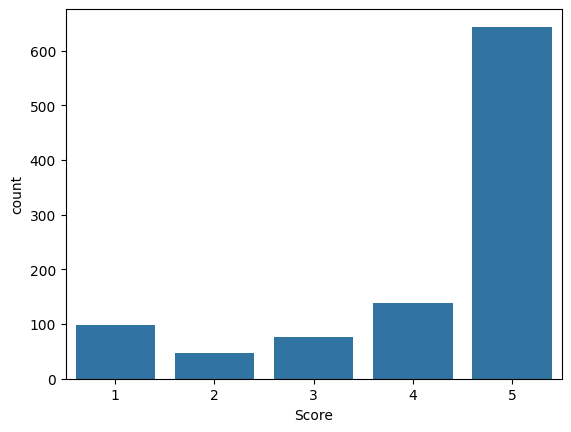

In [26]:
sns.countplot(data = df, x = 'Score')

In [27]:
# Create a new data frame "reviews" to perform exploratory data analysis upon that
reviews = df
# Dropping null values
reviews.dropna(inplace=True)

In [28]:
score_1 = reviews[reviews['Score'] == 1]
score_2 = reviews[reviews['Score'] == 2]
score_3 = reviews[reviews['Score'] == 3]
score_4 = reviews[reviews['Score'] == 4]
score_5 = reviews[reviews['Score'] == 5]

In [29]:
reviews_sample = pd.concat([score_1,score_2,score_3,score_4,score_5],axis=0)
reviews_sample.reset_index(drop=True,inplace=True)

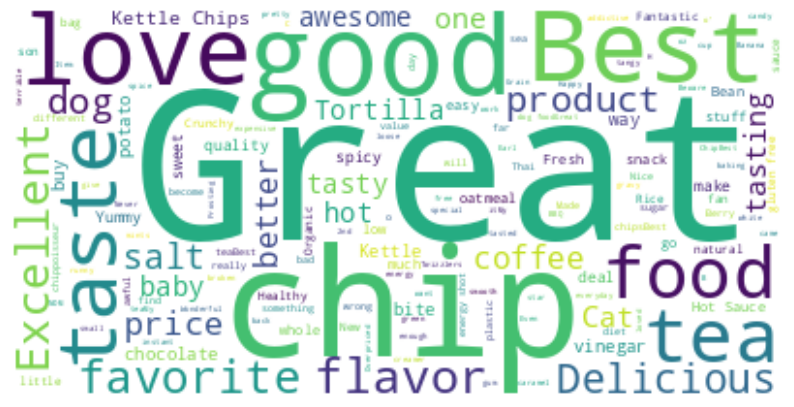

In [30]:
#Wordcloud function's input needs to be a single string of text.
# concatenating all Summaries into a single string.
# similarly you can build for Text column
reviews_str = reviews_sample.Summary.str.cat()
wordcloud = WordCloud(background_color='white').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [31]:
# Now let's split the data into Negative (Score is 1 or 2) and Positive (4 or 5) Reviews.
negative_reviews = reviews_sample[reviews_sample['Score'].isin([1,2]) ]
positive_reviews = reviews_sample[reviews_sample['Score'].isin([4,5]) ]
# Transform to single string
negative_reviews_str = negative_reviews.Summary.str.cat()
positive_reviews_str = positive_reviews.Summary.str.cat()


### Create WordCloud

Text(0.5, 1.0, 'Reviews with Negative Scores')

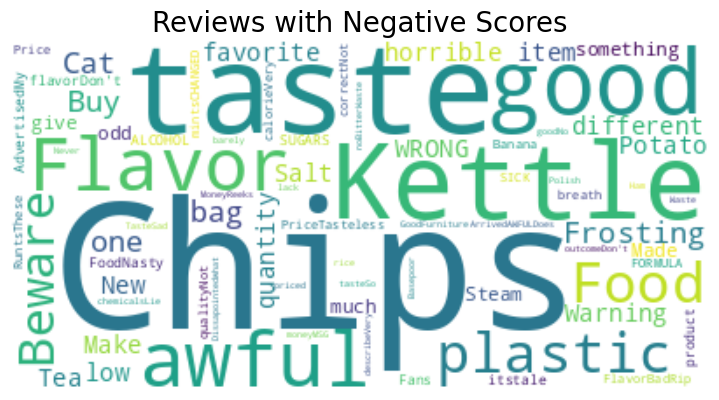

In [32]:
wordcloud_negative = WordCloud(background_color='white').generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color='black').generate(positive_reviews_str)
# Plot
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Negative Scores',fontsize=20)

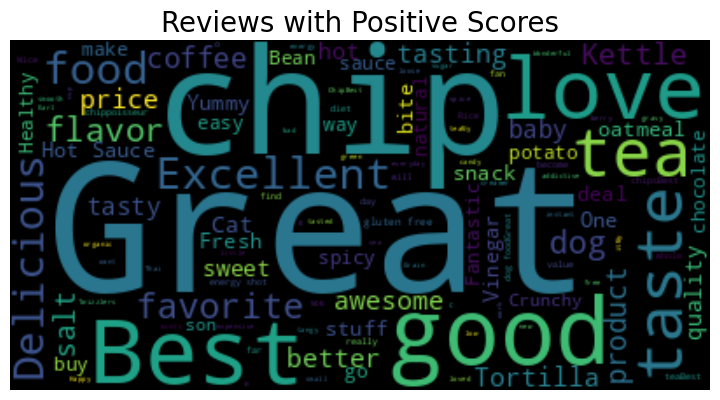

In [33]:
fig = plt.figure(figsize=(10,10))
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Reviews with Positive Scores',fontsize=20)
plt.show()

### Sentiment Score

### Install vaderSentiment

In [34]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.4 MB/s eta 0:00:00


In [35]:
import seaborn as sns
import re
import os
import sys
import ast
plt.style.use('fivethirtyeight')
# Function for getting the sentiment
cp = sns.color_palette()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [36]:
# Generating sentiment for all the sentence present in the dataset
emptyline=[]
for row in df['Text']:

    vs=analyzer.polarity_scores(row)
    emptyline.append(vs)
# Creating new dataframe with sentiments
df_sentiments=pd.DataFrame(emptyline)
df_sentiments.head()

,neg,neu,pos,compound
0,0.000,0.517,0.483,0.9413
1,0.129,0.762,0.110,-0.1027
2,0.123,0.608,0.268,0.8532
3,0.000,0.868,0.132,0.4404
4,0.000,0.369,0.631,0.9468


In [37]:
# Merging the sentiments back to reviews dataframe
df_c = pd.concat([df.reset_index(drop=True), df_sentiments], axis=1)
df_c.head(3)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...,0.000,0.517,0.483,0.9413
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled jumbo salted peanuts.....,0.129,0.762,0.110,-0.1027
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","confection around centuries. light, pillowy ci...",0.123,0.608,0.268,0.8532


In [38]:
# Convert scores into positive and negetive sentiments using some threshold
df_c['Sentiment'] = np.where(df_c['compound'] >= 0 , 'Positive','Negative')
df_c.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...,0.000,0.517,0.483,0.9413,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled jumbo salted peanuts.....,0.129,0.762,0.110,-0.1027,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","confection around centuries. light, pillowy ci...",0.123,0.608,0.268,0.8532,Positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,looking secret ingredient robitussin believe f...,0.000,0.868,0.132,0.4404,Positive
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great taffy great price. wide assortment yummy...,0.000,0.369,0.631,0.9468,Positive


### Result

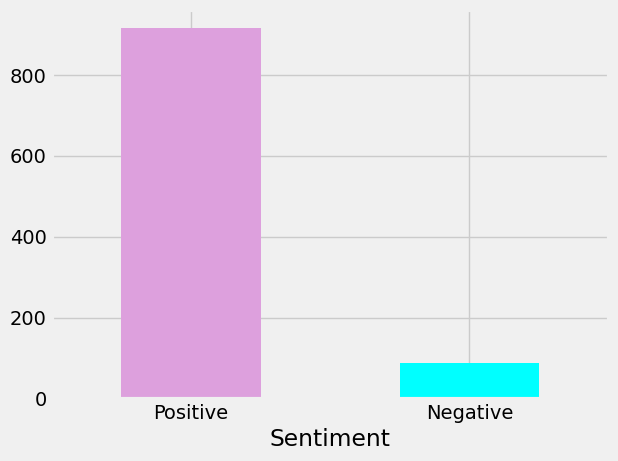

In [39]:
result=df_c['Sentiment'].value_counts()
result.plot(kind='bar', rot=0, color=['plum','cyan']);